In [1]:
pip install chemometrics

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data=pd.read_excel(r"C:\Users\Wallstreet consult\Downloads\Final PCA Dataset.xlsx")
data.head()

,Pure Metronidazole,Authentic UK Reference Sample,MET P3,MET P24,MET P38,MET P41,MET P57,MET P34,MET P18,MET P39,...,MET P11,MET P10,MET P48,MET P53,MET P33,MET P26,MET P56,MET P15,MET P16,MET P30
0,0.002543,0.001233,0.005422,0.001851,0.002054,0.003552,0.002871,0.002385,0.002881,0.002216,...,0.005057,0.001992,0.005788,0.003265,0.010879,0.005046,0.003625,0.042523,0.056144,0.039896
1,0.002546,0.001333,0.005511,0.001910,0.002116,0.003621,0.002824,0.002477,0.002832,0.002189,...,0.005111,0.002043,0.005766,0.003101,0.010828,0.004921,0.003586,0.042370,0.056218,0.039584
2,0.002450,0.001362,0.005524,0.001941,0.002096,0.003619,0.002664,0.002609,0.002795,0.002162,...,0.005197,0.002026,0.005842,0.003034,0.010903,0.005032,0.003521,0.042350,0.056476,0.039552
3,0.002554,0.001434,0.005600,0.001944,0.002036,0.003738,0.002641,0.002660,0.002746,0.002218,...,0.005252,0.002061,0.005795,0.003010,0.010925,0.005094,0.003503,0.042134,0.056581,0.039517
4,0.002812,0.001541,0.005674,0.001922,0.002045,0.003814,0.002598,0.002619,0.002858,0.002202,...,0.005249,0.002039,0.005712,0.003068,0.010981,0.005053,0.003353,0.042075,0.056598,0.039550


In [38]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate the Calinski-Harabasz index
def calinski_harabasz_index(data, labels):
    """
    Compute the Calinski-Harabasz index.

    Parameters:
    - data (numpy.ndarray): Scaled data.
    - labels (numpy.ndarray): Cluster labels.

    Returns:
    - float: Calinski-Harabasz index.
    """
    n_clusters = len(np.unique(labels))
    cluster_centers = np.array([np.mean(data[labels == i], axis=0) for i in range(1, n_clusters + 1)])
    overall_center = np.mean(data, axis=0)

    num = np.sum([len(data[labels == i]) * np.sum((data[labels == i] - cluster_centers[i-1])**2, axis=0)
                  for i in range(1, n_clusters + 1)], axis=0)
    denom = np.sum([np.sum((data[labels == i] - overall_center)**2, axis=0) for i in range(1, n_clusters + 1)], axis=0)

    return np.sum(num / denom) * (data.shape[0] - n_clusters) / ((n_clusters - 1) * np.sum(num / np.sum(labels == i) for i in range(1, n_clusters + 1)))

# Assuming you have loaded your data into a NumPy array named data
# Extract the relevant data
sample_names = np.arange(data.shape[0])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Hierarchical Cluster Analysis (HCA)
linkage_method = 'ward'  # You can choose other linkage methods like 'single', 'complete', etc.
dendrogram_threshold = 5  # Adjust the threshold for cutting the dendrogram

# Calculate linkage matrix
Z = linkage(scaled_data, method=linkage_method)

# Determine the optimal number of clusters using Calinski-Harabasz index
max_clusters = 10
calinski_harabasz_scores = []

for n_clusters in range(2, max_clusters + 1):
    labels = fcluster(Z, n_clusters, criterion='maxclust')
    calinski_harabasz_scores.append((n_clusters, calinski_harabasz_index(scaled_data, labels)))

# Find the number of clusters that maximizes the Calinski-Harabasz index
optimal_clusters = max(calinski_harabasz_scores, key=lambda x: x[1])[0]
print(f"Optimal Number of Clusters: {optimal_clusters}")

# Assign cluster labels using the optimal number of clusters
labels = fcluster(Z, optimal_clusters, criterion='maxclust')

# Add cluster labels to the original DataFrame
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = labels

# Display the DataFrame with cluster labels
print(df_with_clusters)


C:\Users\Wallstreet consult\AppData\Local\Temp\ipykernel_7028\1371990222.py:29: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(num / denom) * (data.shape[0] - n_clusters) / ((n_clusters - 1) * np.sum(num / np.sum(labels == i) for i in range(1, n_clusters + 1)))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [17]:
pure_uk_reference = data.iloc[:2, :]

In [18]:
other_samples = data.iloc[2:, :]

In [19]:
sample_names = other_samples.index

In [20]:
numeric_data = other_samples.values

In [21]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [22]:
# Perform PCA
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_data)

In [23]:
# Create a DataFrame with the principal components and sample names
pc_data = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)], index=sample_names)


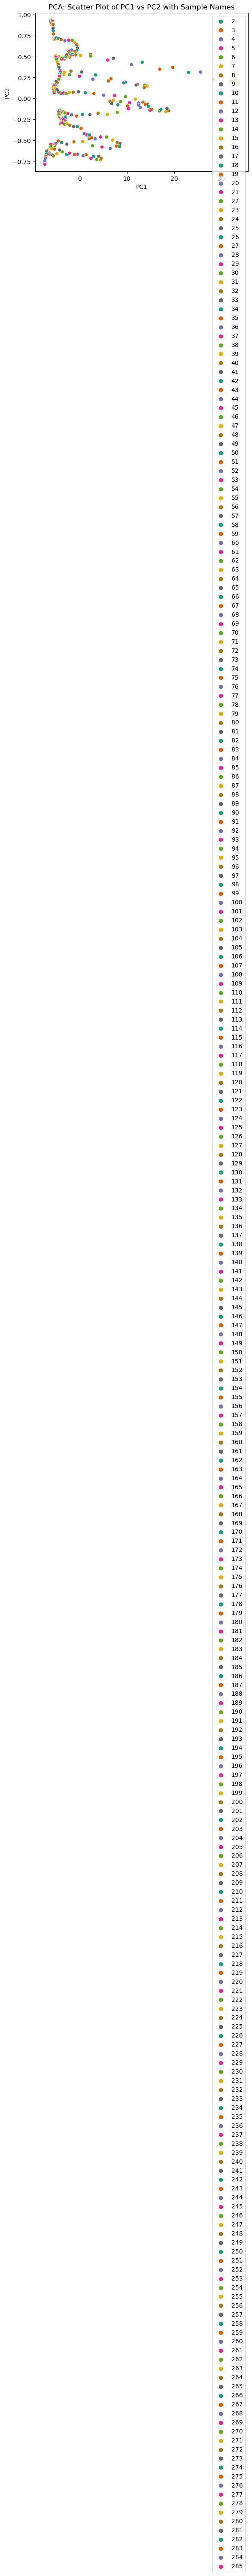

In [26]:
# Visualize PCA Results with Sample Names
sns.scatterplot(x='PC1', y='PC2', data=pc_data, hue=pc_data.index, palette='Dark2')
plt.title('PCA: Scatter Plot of PC1 vs PC2 with Sample Names')
plt.show()

AttributeError: QuadMesh.set() got an unexpected keyword argument 'row_labels'

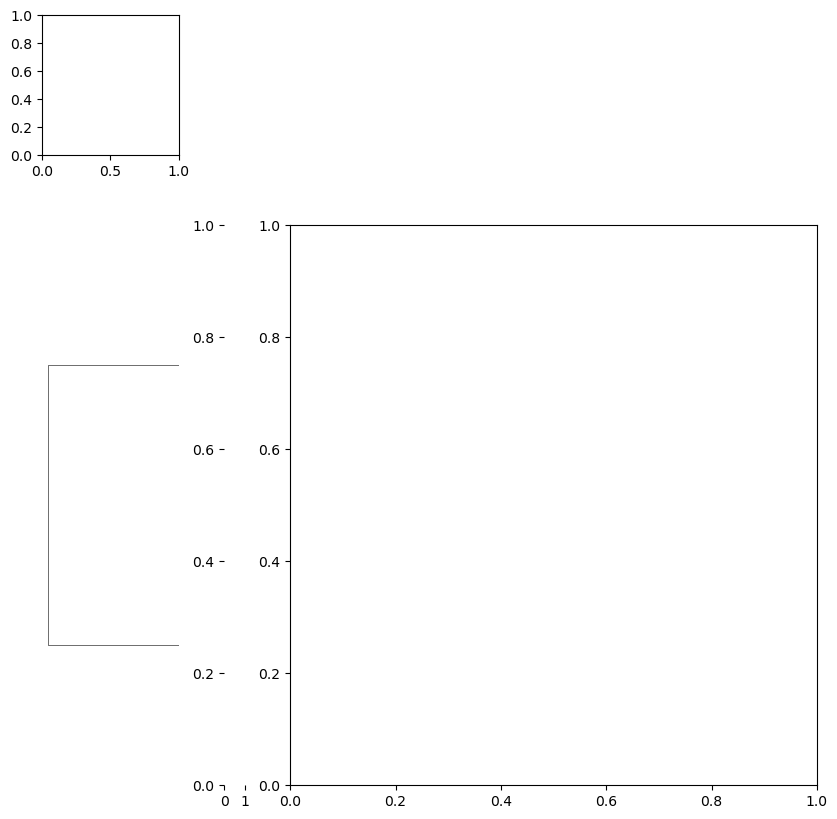

In [14]:
# Perform Hierarchical Cluster Analysis (HCA)
n_clusters =2  # Adjust as needed
hca = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = hca.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
pc_data['Cluster'] = clusters

# Visualize HCA Results with Sample Names
sns.clustermap(scaled_data, row_cluster=True, col_cluster=False, row_colors=[sns.color_palette('husl', n_clusters)[cluster] for cluster in clusters], row_labels=sample_names)
plt.title('Hierarchical Cluster Analysis with Sample Names')
plt.show()